In [40]:
import spacy
from tqdm import tqdm
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

First we will load in the data from data/SOTU.csv

In [3]:
import pandas as pd

sou = pd.read_csv('data/SOTU.csv')

In [4]:
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


First in this analysis, we will study speeches from 2000 onwards. So we will first subset for those years in the dataframe

In [5]:
recent_sou = sou[sou['Year'] >= 2000]

recent_sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
5,Donald J. Trump,2019.0,"\nThe President. Madam Speaker, Mr. Vice Presi...",5519
6,Donald J. Trump,2018.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",5755
7,Donald J. Trump,2017.0,"\nThank you very much. Mr. Speaker, Mr. Vice P...",4903
8,Barack Obama,2016.0,"\nThank you. Mr. Speaker, Mr. Vice President, ...",5956
9,Barack Obama,2015.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",6659


Using the nlp function from Spacy, we'll process all of the speeches in the subsetted dataframe.

In [11]:
nlp = spacy.load("en_core_web_sm")

speeches_tokens = []

for text in recent_sou['Text']:
    speeches_tokens.append(nlp(text))

Here we find the top 20 most frequent tokens from the processed sou speeches. We filter out all stop words, punctuation, and spaces before counting the top 20 most frequent tokens.

In [13]:
tokens = []

for speech in speeches_tokens:
    for token in speech:
        if not token.is_stop and not token.is_punct and not token.is_space:
            tokens.append(token.text.lower())

token_counter = Counter(tokens)
top_20_tokens = token_counter.most_common(20)
print(top_20_tokens)

[('america', 816), ('people', 637), ('american', 582), ('new', 530), ('years', 439), ('americans', 437), ('world', 425), ('year', 406), ('country', 369), ('jobs', 348), ('tonight', 344), ('work', 324), ('know', 323), ('let', 320), ('congress', 317), ('nation', 311), ('time', 301), ('help', 282), ('need', 266), ('tax', 255)]


Here, we essentially do the same as above, but for lemmas, which are the base components of words. For instance, "play" is a lemma for "plays", "player", and "played". 

In [14]:
lemmas = []

for speech in speeches_tokens:
    for token in speech:
        if not token.is_stop and not token.is_punct and not token.is_space:
            lemmas.append(token.lemma_.lower())

lemma_counter = Counter(lemmas)
top_20_lemmas = lemma_counter.most_common(20)
print(top_20_lemmas)

[('year', 845), ('america', 816), ('people', 639), ('american', 587), ('work', 557), ('new', 532), ('job', 486), ('country', 435), ('americans', 432), ('world', 426), ('know', 395), ('nation', 388), ('help', 378), ('need', 353), ('time', 351), ('tonight', 344), ('child', 332), ('let', 326), ('congress', 317), ('come', 301)]


One interesting observation between the lemma counts and token counts is the word "year". In the token counts, there are two similar tokens: "years" and "year". They show up with 439 and 406 counts respectively. However, in the lemma counts, we only see "year" with a count of 845, which is the sum of the two token counts. This checks out, as they share the same lemma, and one would expect for their counts to combine in the lemma aggregation. However, I am surprised that the lemma counts for "year" isn't higher due to other possible tokens like "yearly". Another token, lemma pairing I'm surprised about is "american" and "america" being two separate lemmas, when one would initially think that "america" would be the lemma for "american". 

The main finding between the two lists is that most of the top tokens are the top lemmas. However, the count for the lemma will always be higher than or equal to the count of the token, because, there are multiple tokens whose counts aggregate under one shared lemma. An example is the "child" lemma. It shows up in the top lemmas list, but not in the top tokens list. This is probably because there are various words that stem from "child" that show up in the speeches like "children", "childs", or maybe even "childish". 

This is the function to get the most common words in a given year's State of the Union speech.

In [29]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df
    #df['Year'] = df['Year'].astype('int')
    df_subset = df[df['Year'] == year]
    # Step 2: Process the text with spaCy
    tokens = nlp(df_subset['Text'].iloc[0])
    # Step 3: Get lemmas
    lemmas = []
    for token in tokens: 
        if not token.is_stop and not token.is_punct and not token.is_space:
            lemmas.append(token.lemma_.lower())
    lemma_counter = Counter(lemmas)
    top_lemmas = lemma_counter.most_common(n)
    return top_lemmas

We can test our function on the year 2024

In [30]:
get_most_common_words(sou, 2024)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29),
 ('pay', 29),
 ('come', 26),
 ('home', 25),
 ('family', 24),
 ('future', 23),
 ('million', 23),
 ('like', 21),
 ('build', 21),
 ('laughter', 20),
 ('americans', 20),
 ('history', 19),
 ('world', 19),
 ('right', 19),
 ('tax', 19),
 ('house', 18)]

Let's compare the top 20 lemmas from the 2023 and 2017 speeches

In [33]:
words_2023 = get_most_common_words(sou, 2023, n=20)
words_2017 = get_most_common_words(sou, 2017, n=20)

In [35]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [36]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

/tmp/ipykernel_1328/3016163171.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1328/3016163171.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')


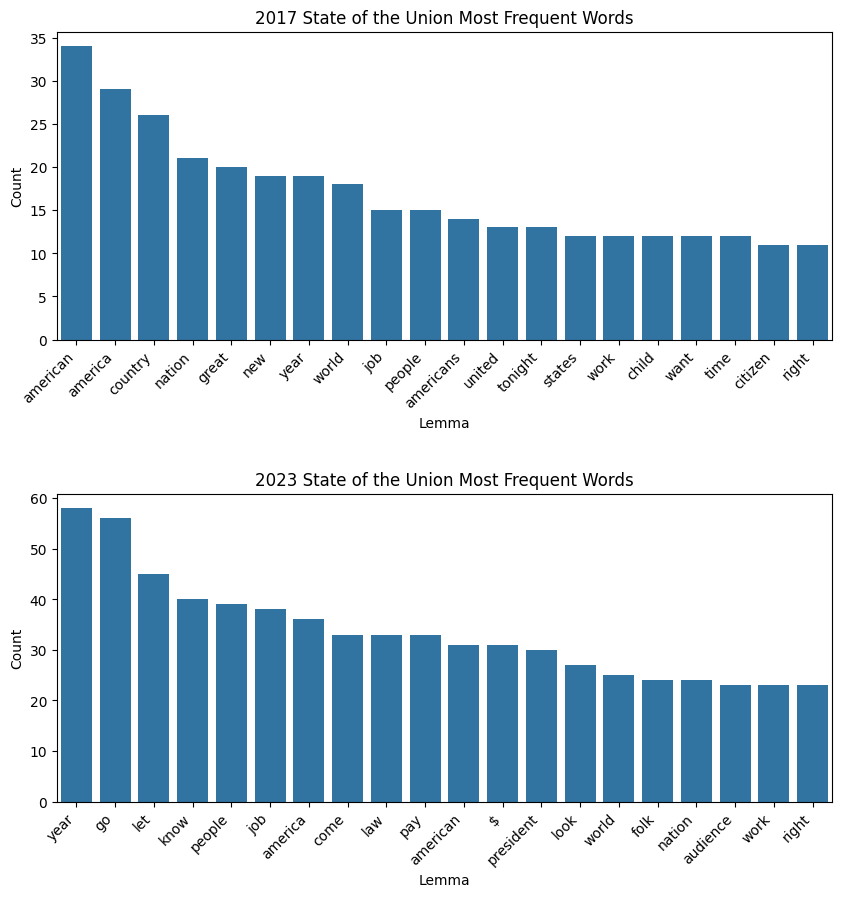

In [53]:
df_2017 = pd.DataFrame(words_2017, columns = ['Lemma', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns = ['Lemma', 'Count'])

fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data = df_2017, x='Lemma', y='Count', ax = axs[0])
sns.barplot(data = df_2023, x = 'Lemma', y='Count', ax = axs[1])

_ = axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
_ = axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[0].set_title("2017 State of the Union Most Frequent Words")
axs[1].set_title("2023 State of the Union Most Frequent Words")

plt.savefig("outputs/2017_vs_2023_most_frequent_words.png")